In [2]:
from simhash import Simhash, SimhashIndex
from jieba import analyse

import numpy as np
import matplotlib.pyplot as plt
import jieba
import re
import ast
import json

In [3]:
def get_dataA(len):
    with open('data.json', 'r', encoding = 'UTF-8') as f:
        text = f.read()
        text_list = jieba.cut_for_search(text)

    # 去除停用词
    analyse.set_stop_words('StopWords.txt')

    # 基于TF-IDF算法进行关键词抽取
    key_words = analyse.extract_tags(text, topK = 10000)

    test = []
    for i in range(len):
        test.append(key_words[i])
    return test

    # 转字符串存进‘A.txt’
    with open('A.txt', 'w', encoding = 'UTF-8') as f:
        res = ' '.join(key_words)
        f.write(res)

In [4]:
def get_dataB(len):
    with open('context.json', 'r', encoding = 'UTF-8') as f:
        text = f.read()
        text_list = jieba.cut_for_search(text)

    analyse.set_stop_words('StopWords.txt')
    
    # 基于TF-IDF算法进行关键词抽取
    key_words = analyse.extract_tags(text, topK = 10000)

    test = []
    for i in range(len):
        test.append(key_words[i])
    return test

    with open('B.txt', 'w', encoding = 'UTF-8') as f:
        res = ' '.join(key_words)
        f.write(res)

In [5]:
def get_hash(file):
    with open(str(file), 'r', encoding = 'UTF-8') as f:
        text = f.read()
        res = text.split()
    return Simhash(res)

海明距离： [1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301, 321, 341, 361, 381, 401, 421, 441, 461, 481, 501, 521, 541, 561, 581, 601, 621, 641, 661, 681, 701, 721, 741, 761, 781, 801, 821, 841, 861, 881, 901, 921, 941, 961, 981]


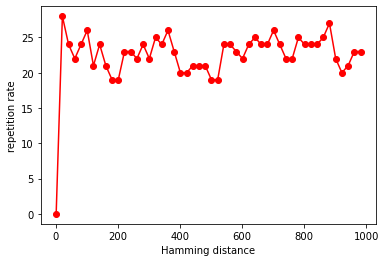

In [7]:
def main():
    # get_dataA()
    # get_dataB()

    # hash1 = get_hash('A.txt')
    # hash2 = get_hash('B.txt')
    # dist = hash1.distance(hash2)

    x, y = [], []
    
    len = 1
    while len < 1000:
        test1 = get_dataA(len)
        test2 = get_dataB(len)
        x.append(len)
        y.append(Simhash(test1).distance(Simhash(test2)))
        len += 20
        
    print('海明距离：', x)
    

    # for d in x:
    #     print('海明距离阈值：{} 是否相似{}'.format(d, dist <= d))
    #     isSimilar.append(dist <= d)

    plt.plot(x, y, 'o-', color = 'r')
    plt.xlabel('Hamming distance')
    plt.ylabel('repetition rate')
    plt.show()


if __name__ == "__main__":
    main()